In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ASUS\.conda\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\ASUS\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [1]:
import pandas as pd
import pickle
import numpy as np
import time
import os

from torch.utils.data import TensorDataset, DataLoader
import torch

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


def load_data_per_subject(i):
    subject_path = (
        "D:\AIproject\emotion recognition\DEAP\data_preprocessed_python/"
        + f"s{i:02n}.dat"
    )
    subject = pickle.load(open(subject_path, "rb"), encoding="latin1")

    return subject


C:\Users\ASUS\.conda\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ASUS\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\ASUS\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
def get_one_subject(subject_index, num_classes=2):
    # get data of one subject according to the subject's index (1 to 32)
    # subject_index: an interger in range (1, 32)
    # return:
    #   data (numpy array),
    #   val_labels: binary label of valence,
    #   ar_label: binary label of arousal.

    data = load_data_per_subject(subject_index)
    X = data["data"][:, :32, :]
    labels = data["labels"]
 

    return X, labels


In [3]:
data = []
labels = []
for sub in range(1, 33):
    X, l = get_one_subject(sub)
    labels.append(l)
    data.append(X)

In [6]:
data = np.array(data)
labels = np.array(labels)

In [109]:
X[0]

array([[(array(['22'], dtype='<U2'), array(['male'], dtype='<U4'), array([[(array([[array([[4390.25641026, 4097.43589744, 4267.69230769, ..., 4512.30769231,
        4368.71794872, 4287.69230769],
       [4397.43589744, 4095.8974359 , 4248.20512821, ..., 4506.15384615,
        4272.82051282, 4187.69230769],
       [4391.79487179, 4091.28205128, 4261.02564103, ..., 4494.87179487,
        4342.56410256, 4256.41025641],
       ...,
       [4392.82051282, 4107.17948718, 4288.71794872, ..., 4532.82051282,
        4395.38461538, 4307.17948718],
       [4385.64102564, 4108.71794872, 4328.20512821, ..., 4542.56410256,
        4468.71794872, 4431.79487179],
       [4382.56410256, 4108.71794872, 4385.12820513, ..., 4573.33333333,
        4560.51282051, 4549.23076923]])],
       [array([[4389.23076923, 4108.71794872, 4203.58974359, ..., 4440.        ,
        4335.38461538, 4298.97435897],
       [4397.43589744, 4114.87179487, 4180.        , ..., 4436.41025641,
        4310.76923077, 4267.69230769

In [103]:
X = data[0][0][0][0]

In [104]:
X[0][0][0][2][0][0][0][1][0].shape

(7808, 14)

In [105]:
a = X[0][0][0][2][0][0][1][5][0].transpose()
a.shape

(14, 24320)

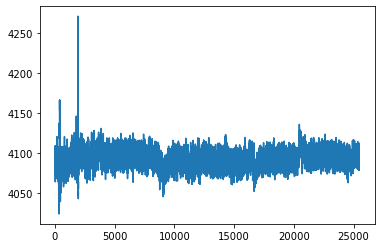

In [84]:
plt.plot(a[:,1])

In [89]:
a = X[0][0][0][4]
a.squeeze()

array([4, 3, 5, 4, 4, 1, 5, 1, 1, 5, 4, 4, 4, 3, 2, 3, 1, 3], dtype=uint8)

In [110]:
# subject_data = []
age = []
gender = []
eeg = {
    "baseline": [],
    "stimuli": []
}
ecg = {
    "baseline": [],
    "stimuli": []
}
valence = []
arousal = []
dominance = []
for i in range(23):
    age.append(X[i][0][0][0])
    gender.append(X[i][0][0][1])
    eeg["baseline"].append(X[i][0][0][2][0][0][0])
    eeg["stimuli"].append(X[i][0][0][2][0][0][1])
    ecg["baseline"].append(X[i][0][0][3][0][0][0])
    ecg["stimuli"].append(X[i][0][0][3][0][0][1])
    valence.append(X[i][0][0][4])
    arousal.append(X[i][0][0][5])
    dominance.append(X[i][0][0][6])


In [111]:
eeg["baseline"] = np.array(eeg["baseline"])
eeg["stimuli"] = np.array(eeg["stimuli"])
ecg["baseline"] = np.array(ecg["baseline"])
ecg["stimuli"] = np.array(ecg["stimuli"])

In [112]:
all_data = {
    "age": np.array(age),
    "gender":np.array(gender),
    "eeg":eeg,
    "ecg":ecg,
    "valence":np.array(valence),
    "arousal":np.array(arousal),
    "dominance":np.array(dominance),
}

In [113]:
all_data

{'age': array([['22'],
        ['30'],
        ['27'],
        ['26'],
        ['27'],
        ['25'],
        ['23'],
        ['29'],
        ['31'],
        ['24'],
        ['26'],
        ['25'],
        ['28'],
        ['25'],
        ['29'],
        ['28'],
        ['26'],
        ['25'],
        ['33'],
        ['23'],
        ['26'],
        ['28'],
        ['25']], dtype='<U2'),
 'gender': array([['male'],
        ['female'],
        ['male'],
        ['female'],
        ['female'],
        ['male'],
        ['female'],
        ['male'],
        ['female'],
        ['male'],
        ['male'],
        ['male'],
        ['male'],
        ['male'],
        ['male'],
        ['female'],
        ['female'],
        ['female'],
        ['male'],
        ['female'],
        ['male'],
        ['male'],
        ['male']], dtype='<U6'),
 'eeg': {'baseline': array([[[array([[4390.25641026, 4097.43589744, 4267.69230769, ..., 4512.30769231,
          4368.71794872, 4287.69230769],
         

In [2]:
import pickle

    

# a_file = open("DREAMER.pkl", "wb")
# pickle.dump(all_data, a_file)
# a_file.close()

a_file = open("DREAMER.pkl", "rb")
output = pickle.load(a_file)
print(output)

{'age': array([['22'],
       ['30'],
       ['27'],
       ['26'],
       ['27'],
       ['25'],
       ['23'],
       ['29'],
       ['31'],
       ['24'],
       ['26'],
       ['25'],
       ['28'],
       ['25'],
       ['29'],
       ['28'],
       ['26'],
       ['25'],
       ['33'],
       ['23'],
       ['26'],
       ['28'],
       ['25']], dtype='<U2'), 'gender': array([['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male']], dtype='<U6'), 'eeg': {'baseline': array([[[array([[4390.25641026, 4097.43589744, 4267.69230769, ..., 4512.30769231,
        4368.71794872, 4287.69230769],
       [4397.43589744, 4095.8974359 , 4248.20512821, ...,

In [3]:
output["eeg"]["baseline"].shape

(23, 18, 1)

In [4]:
output["valence"].shape

(23, 18, 1)

In [5]:
eeg = output["eeg"]

In [10]:
x = eeg["stimuli"][10, 0][0][:, 0]

In [11]:
x

array([4357.94871795, 4356.41025641, 4351.28205128, ..., 4361.53846154,
       4365.64102564, 4367.17948718])

In [127]:
ma = 0
mi = 1000000000
for s in range(23):
    for i in range(18):
        for c in range(14):
            if len(eeg['stimuli'][s, i,][0][:, c]) > ma:
                ma = len(eeg['stimuli'][s, i,][0][:, c])
            if mi > len(eeg['stimuli'][s, i,][0][:, c]):
                mi = len(eeg['stimuli'][s, i,][0][:, c])

print(mi/128)
print(ma/128)

67.0
394.0


In [128]:
new_stimuli = []
for s in range(23):
    new_s = []
    for i in range(18):
        new_i = []
        for c in range(14):
            
            new_i.append(eeg['stimuli'][s, i,][0][-60*128:, c])
        new_s.append(new_i)
    new_stimuli.append(new_s)
new_stimuli = np.array(new_stimuli)

In [129]:
new_stimuli.shape

(23, 18, 14, 7680)

In [130]:
new_data = output.copy()

In [131]:
new_data["eeg"]["stimuli"] = new_stimuli

In [132]:
a_file = open("DREAMER_60s.pkl", "wb")
pickle.dump(new_data, a_file)
a_file.close()

In [12]:
a_file = open("DREAMER_60s.pkl", "rb")
new_data = pickle.load(a_file)
print(new_data)

{'age': array([['22'],
       ['30'],
       ['27'],
       ['26'],
       ['27'],
       ['25'],
       ['23'],
       ['29'],
       ['31'],
       ['24'],
       ['26'],
       ['25'],
       ['28'],
       ['25'],
       ['29'],
       ['28'],
       ['26'],
       ['25'],
       ['33'],
       ['23'],
       ['26'],
       ['28'],
       ['25']], dtype='<U2'), 'gender': array([['male'],
       ['female'],
       ['male'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['male'],
       ['female'],
       ['female'],
       ['female'],
       ['male'],
       ['female'],
       ['male'],
       ['male'],
       ['male']], dtype='<U6'), 'eeg': {'baseline': array([[[array([[4390.25641026, 4097.43589744, 4267.69230769, ..., 4512.30769231,
        4368.71794872, 4287.69230769],
       [4397.43589744, 4095.8974359 , 4248.20512821, ...,

In [13]:
new_data["eeg"]["stimuli"].shape

(23, 18, 14, 7680)

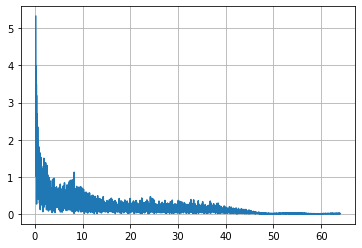

In [141]:
from scipy.fftpack import fft, fftfreq

N = 7680
T = 1.0 / 128
x = np.linspace(0.0, N*T, N, endpoint=False)
y = new_stimuli[6,7,6]
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf[10:], 2.0/N * np.abs(yf[10:N//2]))
plt.grid()
plt.show()

2.47789661611977

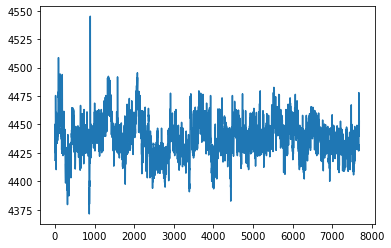

In [142]:
plt.plot(y)
min(np.abs(yf)**2)

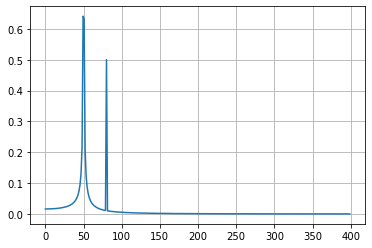

In [24]:
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [41]:
output['valence'].shape

(23, 18, 1)

In [10]:
labels.shape

(32, 40, 4)

In [7]:
# from data_preprocess import DREAMER_feature_extracting
# from utils import *

import scipy
import numpy as np

from scipy.signal import butter, lfilter, filtfilt


from tqdm import tqdm

In [13]:
eeg_bands = {"theta": [4, 8], "alpha": [8, 12], "beta": [12, 20], "gamma":[30, 60]}

def butter_bandpass(lowcut, highcut, fs=128, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype="band")


def butter_bandpass_filter(data, lowcut, highcut, fs=128, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs = 128, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def extract_DE_EEG_bands(x):
    theta = butter_bandpass_filter(x, eeg_bands["theta"][0], eeg_bands["theta"][1])
    alpha = butter_bandpass_filter(x, eeg_bands["alpha"][0], eeg_bands["alpha"][1])
    beta = butter_bandpass_filter(x, eeg_bands["beta"][0], eeg_bands["beta"][1])
    gamma = butter_bandpass_filter(x, eeg_bands["gamma"][0], eeg_bands["gamma"][1])

    de_features = []

    for signal in [theta, alpha, beta, gamma]:
        de_features.append(calculate_DE(signal))

    return de_features

def DEAP_feature_extracting(data, labels, segment_length = 2, overlap = 1, sampling_rate = 128):
    new_data = []
    new_labels = []
    N_segment  = int((int(data.shape[-1] /(sampling_rate))  - segment_length)/ (segment_length - overlap)  + 1)
    print(N_segment)
    for sub in tqdm(range(32)):
        sub_feats = []
        sub_labels = []
        for instance  in range(40):
            instance_feats = []
            instance_labels = []
            for channel in range(32):
                x = data[sub, instance, channel]
                theta = butter_bandpass_filter(x, eeg_bands["theta"][0], eeg_bands["theta"][1])
                alpha = butter_bandpass_filter(x, eeg_bands["alpha"][0], eeg_bands["alpha"][1])
                beta = butter_bandpass_filter(x, eeg_bands["beta"][0], eeg_bands["beta"][1])
                gamma = butter_highpass_filter(x, eeg_bands["gamma"][0])

                segment_feats = []
                segment_labels = []
                for i in range(N_segment):
                    de_feats = [calculate_DE(theta[i*128: (i+segment_length)*128]), 
                               calculate_DE(alpha[i*128: (i+segment_length)*128]),
                               calculate_DE(beta[i*128: (i+segment_length)*128]),
                               calculate_DE(gamma[i*128: (i+segment_length)*128])]
                    
                    segment_feats.append(de_feats)
                instance_feats.append(segment_feats)

            sub_feats.append(instance_feats)
            sub_labels.append(np.repeat(labels[sub, instance], N_segment))

        new_data.append(sub_feats)
        new_labels.append(sub_labels)

    return np.array(new_data).transpose(0, 1, 3, 2, 4), np.array(new_labels)


def calculate_DE(x):
    de = 1 / 2 * np.log2(2 * np.pi * np.e * np.std(x))

    return de


In [15]:
X, y = DEAP_feature_extracting(data = data[:, :, :, 128*3:], labels = labels[:, :, 0], segment_length = 2, overlap = 1, sampling_rate = 128)


  0%|                                                                                           | 0/32 [00:00<?, ?it/s]

59



100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [07:00<00:00, 13.13s/it]


In [16]:
X.shape

(32, 40, 59, 32, 4)

In [17]:
y.shape

(32, 40, 59)

In [18]:
print(23*18)

414


In [19]:
np.save("DEAP_DE_DCGNN_full.npy", X)
np.save("DEAP_valence_DE_DCGNN.npy", y)

In [151]:
y

array([[[4, 4, 4, ..., 4, 4, 4],
        [3, 3, 3, ..., 3, 3, 3],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [1, 1, 1, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [2, 2, 2, ..., 2, 2, 2],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [1, 1, 1, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [4, 4, 4, ..., 4, 4, 4],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [2, 2, 2, ..., 2, 2, 2],
        [3, 3, 3, ..., 3, 3, 3]],

       ...,

       [[4, 4, 4, ..., 4, 4, 4],
        [2, 2, 2, ..., 2, 2, 2],
        [5, 5, 5, ..., 5, 5, 5],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [1, 1, 1, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 

In [152]:
arousal = new_data["arousal"]
dominance = new_data["dominance"]

In [156]:
arousal

array([[[3],
        [3],
        [4],
        [3],
        [4],
        [2],
        [4],
        [2],
        [2],
        [3],
        [2],
        [3],
        [3],
        [1],
        [5],
        [2],
        [2],
        [5]],

       [[2],
        [4],
        [5],
        [5],
        [2],
        [3],
        [2],
        [5],
        [3],
        [4],
        [2],
        [3],
        [4],
        [3],
        [5],
        [5],
        [3],
        [5]],

       [[4],
        [5],
        [5],
        [5],
        [4],
        [3],
        [3],
        [4],
        [2],
        [2],
        [1],
        [3],
        [4],
        [2],
        [2],
        [2],
        [2],
        [3]],

       [[3],
        [3],
        [4],
        [5],
        [3],
        [4],
        [3],
        [4],
        [3],
        [4],
        [1],
        [2],
        [2],
        [2],
        [2],
        [1],
        [3],
        [3]],

       [[2],
        [4],
        [4],
        [4],
    

In [22]:
arousal = np.repeat(labels[:, :, :1], 59, axis = 2)

In [23]:
dominance = np.repeat(labels[:, :, 1:2], 59, axis = 2)

In [24]:
np.save("DEAP_arousal_DE_DCGNN.npy", arousal)
np.save("DEAP_dominance_DE_DCGNN.npy", dominance)

In [25]:
arousal

array([[[7.71, 7.71, 7.71, ..., 7.71, 7.71, 7.71],
        [8.1 , 8.1 , 8.1 , ..., 8.1 , 8.1 , 8.1 ],
        [8.58, 8.58, 8.58, ..., 8.58, 8.58, 8.58],
        ...,
        [3.33, 3.33, 3.33, ..., 3.33, 3.33, 3.33],
        [3.24, 3.24, 3.24, ..., 3.24, 3.24, 3.24],
        [5.1 , 5.1 , 5.1 , ..., 5.1 , 5.1 , 5.1 ]],

       [[9.  , 9.  , 9.  , ..., 9.  , 9.  , 9.  ],
        [8.01, 8.01, 8.01, ..., 8.01, 8.01, 8.01],
        [9.  , 9.  , 9.  , ..., 9.  , 9.  , 9.  ],
        ...,
        [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
        [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
        [6.05, 6.05, 6.05, ..., 6.05, 6.05, 6.05]],

       [[5.33, 5.33, 5.33, ..., 5.33, 5.33, 5.33],
        [7.21, 7.21, 7.21, ..., 7.21, 7.21, 7.21],
        [7.55, 7.55, 7.55, ..., 7.55, 7.55, 7.55],
        ...,
        [4.53, 4.53, 4.53, ..., 4.53, 4.53, 4.53],
        [4.33, 4.33, 4.33, ..., 4.33, 4.33, 4.33],
        [5.38, 5.38, 5.38, ..., 5.38, 5.38, 5.38]],

       ...,

       [[5.04, 5.04, 5.0